Q1. What is the difference between Ordinal Encoding and Label Encoding? Provide an example of when you
might choose one over the other.

->Encoding techniues are techniques where we assign a numerical value to a categorical data . Ordinal Encoding is a technique where we assign rank to that categorical data where order matters or basically the rank of the category matters whereas in Label Encoding we assign numerical value to that categorical variable where rank does not matter 

In [11]:
# ordinal encoding

import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# Create a sample dataset
data = {'Education': ['College', 'Graduate', 'Postgraduate', 'PhD', 'Graduate', 'Postgraduate', 'College', 'PhD']}
df = pd.DataFrame(data)

# Display the original dataset
print("Original Dataset:")
print(df)

# Perform ordinal encoding
ordinal_encoder = OrdinalEncoder(categories=[['College', 'Graduate', 'Postgraduate', 'PhD']], dtype=int)
df['Education_encoded'] = ordinal_encoder.fit_transform(df[['Education']])

# Display the dataset after ordinal encoding
print("\nDataset after Ordinal Encoding:")
print(df)


Original Dataset:
      Education
0       College
1      Graduate
2  Postgraduate
3           PhD
4      Graduate
5  Postgraduate
6       College
7           PhD

Dataset after Ordinal Encoding:
      Education  Education_encoded
0       College                  0
1      Graduate                  1
2  Postgraduate                  2
3           PhD                  3
4      Graduate                  1
5  Postgraduate                  2
6       College                  0
7           PhD                  3


In [12]:
# nominal encoding 

import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Create a sample dataset
data = {'Flower': ['Rose', 'Tulip', 'Lily', 'Sunflower', 'Tulip', 'Rose', 'Lily', 'Sunflower']}
df = pd.DataFrame(data)

# Display the original dataset
print("Original Dataset:")
print(df)

# Perform nominal encoding (one-hot encoding)
nominal_encoder = OneHotEncoder(sparse=False, drop='first')  # 'drop' is used to avoid the dummy variable trap
encoded_flowers = nominal_encoder.fit_transform(df[['Flower']])
encoded_df = pd.DataFrame(encoded_flowers, columns=nominal_encoder.get_feature_names_out(['Flower']))

# Concatenate the encoded columns with the original dataset
df_encoded = pd.concat([df, encoded_df], axis=1)

# Display the dataset after nominal encoding
print("\nDataset after Nominal Encoding:")
print(df_encoded)


Original Dataset:
      Flower
0       Rose
1      Tulip
2       Lily
3  Sunflower
4      Tulip
5       Rose
6       Lily
7  Sunflower

Dataset after Nominal Encoding:
      Flower  Flower_Rose  Flower_Sunflower  Flower_Tulip
0       Rose          1.0               0.0           0.0
1      Tulip          0.0               0.0           1.0
2       Lily          0.0               0.0           0.0
3  Sunflower          0.0               1.0           0.0
4      Tulip          0.0               0.0           1.0
5       Rose          1.0               0.0           0.0
6       Lily          0.0               0.0           0.0
7  Sunflower          0.0               1.0           0.0


C:\Users\jaide\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Q2. Explain how Target Guided Ordinal Encoding works and provide an example of when you might use it in
a machine learning project.

-> Target Guided Ordinal Encoding assigns the average value to a category with respect to its target value , i will use it in my machine learning model when i categorical data and target variable 



In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Create a sample dataset
np.random.seed(42)
data = {'Category': ['A', 'B', 'A', 'C', 'B', 'C', 'A', 'C', 'B', 'A'],
        'Target': [1, 0, 1, 1, 0, 1, 0, 1, 0, 1]}
df = pd.DataFrame(data)

# Display the original dataset
print("Original Dataset:")
print(df)

# Split the dataset into train and test (not necessary for encoding but for demonstration)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Calculate mean target value for each category in the training set
means = train_df.groupby('Category')['Target'].mean().sort_values()

# Create a mapping dictionary based on mean target values
category_mapping = {category: i for i, category in enumerate(means.index)}

# Apply target-guided ordinal encoding to both train and test sets
train_df['Category_encoded'] = train_df['Category'].map(category_mapping)
test_df['Category_encoded'] = test_df['Category'].map(category_mapping)

# Display the datasets after encoding
print("\nTrain Dataset after Target-Guided Ordinal Encoding:")
print(train_df)

print("\nTest Dataset after Target-Guided Ordinal Encoding:")
print(test_df)


Original Dataset:
  Category  Target
0        A       1
1        B       0
2        A       1
3        C       1
4        B       0
5        C       1
6        A       0
7        C       1
8        B       0
9        A       1

Train Dataset after Target-Guided Ordinal Encoding:
  Category  Target  Category_encoded
5        C       1                 2
0        A       1                 1
7        C       1                 2
2        A       1                 1
9        A       1                 1
4        B       0                 0
3        C       1                 2
6        A       0                 1

Test Dataset after Target-Guided Ordinal Encoding:
  Category  Target  Category_encoded
8        B       0                 0
1        B       0                 0


Q3. Define covariance and explain why it is important in statistical analysis. How is covariance calculated?

->Covariance is a mathematical value that tell us whether a the two variable has kind of proportional relationship or inversely proportional relationship , it is important to statistical analysis to find the most important variable with respect to the target variable , we can perform feature selection by using the covariance . 

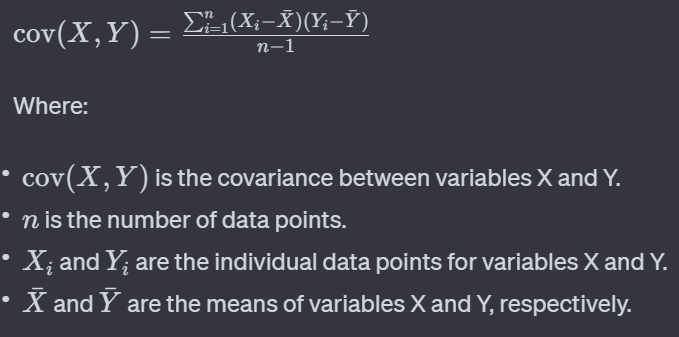

Q4. For a dataset with the following categorical variables: Color (red, green, blue), Size (small, medium,
large), and Material (wood, metal, plastic), perform label encoding using Python's scikit-learn library.
Show your code and explain the output.

->The number is assigned to a variable lexicographically 

In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Create a sample dataset
data = {'Color': ['red', 'green', 'blue', 'red', 'green'],
        'Size': ['small', 'medium', 'large', 'medium', 'small'],
        'Material': ['wood', 'metal', 'plastic', 'wood', 'metal']}

df = pd.DataFrame(data)

# Display the original dataset
print("Original Dataset:")
print(df)

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
df['Color_encoded'] = label_encoder.fit_transform(df['Color'])
df['Size_encoded'] = label_encoder.fit_transform(df['Size'])
df['Material_encoded'] = label_encoder.fit_transform(df['Material'])

# Display the dataset after label encoding
print("\nDataset after Label Encoding:")
print(df)


Original Dataset:
   Color    Size Material
0    red   small     wood
1  green  medium    metal
2   blue   large  plastic
3    red  medium     wood
4  green   small    metal

Dataset after Label Encoding:
   Color    Size Material  Color_encoded  Size_encoded  Material_encoded
0    red   small     wood              2             2                 2
1  green  medium    metal              1             1                 0
2   blue   large  plastic              0             0                 1
3    red  medium     wood              2             1                 2
4  green   small    metal              1             2                 0


In [15]:
#Q5. Calculate the covariance matrix for the following variables in a dataset: Age, Income, and Education
#level. Interpret the results.


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Create a sample dataset
np.random.seed(42)
data = {'Age': np.random.randint(22, 60, 100),
        'Education': ['High School', 'Bachelor', 'Master', 'PhD'] * 25,
        'Income': np.random.randint(30000, 90000, 100)}

df = pd.DataFrame(data)

# Display the original dataset
print("Original Dataset:")
print(df.head())

# Split the dataset into train and test (not necessary for encoding but for demonstration)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Calculate mean income for each category in the training set
age_means = train_df.groupby('Age')['Income'].mean().sort_values()
education_means = train_df.groupby('Education')['Income'].mean().sort_values()

# Create mapping dictionaries based on mean income values
age_mapping = {age: i for i, age in enumerate(age_means.index)}
education_mapping = {edu: i for i, edu in enumerate(education_means.index)}

# Apply target-guided ordinal encoding to both train and test sets
train_df['Age_encoded'] = train_df['Age'].map(age_mapping)
train_df['Education_encoded'] = train_df['Education'].map(education_mapping)

test_df['Age_encoded'] = test_df['Age'].map(age_mapping)
test_df['Education_encoded'] = test_df['Education'].map(education_mapping)

# Display the datasets after encoding
print("\nTrain Dataset after Target-Guided Ordinal Encoding:")
print(train_df.head())

# Calculate the covariance matrix
covariance_matrix = train_df[['Age_encoded', 'Education_encoded', 'Income']].cov()

# Display the covariance matrix
print("\nCovariance Matrix:")
print(covariance_matrix)


Original Dataset:
   Age    Education  Income
0   50  High School   35056
1   36     Bachelor   62482
2   29       Master   77716
3   42          PhD   38110
4   40  High School   43773

Train Dataset after Target-Guided Ordinal Encoding:
    Age    Education  Income  Age_encoded  Education_encoded
55   31          PhD   55939           11                  0
88   30  High School   80647           31                  3
26   36       Master   71523           15                  2
42   29       Master   57890           12                  2
69   50     Bachelor   36776            3                  1

Covariance Matrix:
                    Age_encoded  Education_encoded        Income
Age_encoded           72.834810           2.384494  9.774763e+04
Education_encoded      2.384494           1.287184  3.930322e+03
Income             97747.628797        3930.321994  3.167129e+08


Q6. You are working on a machine learning project with a dataset containing several categorical
variables, including "Gender" (Male/Female), "Education Level" (High School/Bachelor's/Master's/PhD),
and "Employment Status" (Unemployed/Part-Time/Full-Time). Which encoding method would you use for
each variable, and why?

-> I will use one hot encoding for Gender , as there is no rank and there are only two categories for Education Level i will use ordinal encoding and for employment status i will use ordinal encoder as there is rank unemployed < Part-time< Full time 



Q7. You are analyzing a dataset with two continuous variables, "Temperature" and "Humidity", and two
categorical variables, "Weather Condition" (Sunny/Cloudy/Rainy) and "Wind Direction" (North/South/
East/West). Calculate the covariance between each pair of variables and interpret the results.

->We have performed one hot encoding on the categorical variable as there is no specific order in the variable and thereby we have calculated the covariance matrix , for a particular cell is the value is positive than the variables are positively correlated if the value is negative than the value is negatively correlated and if the value is 0 than there is no correlation . Here we should note that higher positive value does not signify that the two variable are more positively correlated as it covariance and not correlation 

In [16]:
import pandas as pd

# Create a sample dataset
data = {
    'Temperature': [25, 22, 20, 28, 30],
    'Humidity': [50, 60, 70, 40, 45],
    'Weather Condition': ['Sunny', 'Cloudy', 'Rainy', 'Sunny', 'Cloudy'],
    'Wind Direction': ['North', 'South', 'East', 'West', 'North']
}

df = pd.DataFrame(data)

# Perform one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['Weather Condition', 'Wind Direction'])

# Display the dataset after one-hot encoding
print("\nDataset after One-Hot Encoding:")
print(df_encoded)

# Calculate the covariance matrix
covariance_matrix_encoded = df_encoded.cov()

# Display the covariance matrix after one-hot encoding
print("\nCovariance Matrix after One-Hot Encoding:")
print(covariance_matrix_encoded)



Dataset after One-Hot Encoding:
   Temperature  Humidity  Weather Condition_Cloudy  Weather Condition_Rainy  \
0           25        50                     False                    False   
1           22        60                      True                    False   
2           20        70                     False                     True   
3           28        40                     False                    False   
4           30        45                      True                    False   

   Weather Condition_Sunny  Wind Direction_East  Wind Direction_North  \
0                     True                False                  True   
1                    False                False                 False   
2                    False                 True                 False   
3                     True                False                 False   
4                    False                False                  True   

   Wind Direction_South  Wind Direction_West  
0     